## Prepping the CSV file

As the data saved into the csv file after the webscraping contains apostrophies ( ' ) and brackets ( [] ) around the values in each column and commas ( , ) in the case of one city name, I used Excel's *Find* and *Replace* functions to remove these special characters.

Now the file is ready.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Import data from CSV, add headers, remove index column

df = pd.read_csv('rest_data.csv', names=['Rank', 'City', 'All restaurants', 'Vegan restaurants'], index_col=0)
df

,City,All restaurants,Vegan restaurants
Rank,,,
1,London,20237,4192
2,Manchester,2584,429
3,Birmingham,2028,420
4,Edinburgh,1927,1927
5,Glasgow,1875,500
6,Leeds,1707,435
7,Liverpool,1602,376
8,Bristol,1302,369
9,Sheffield,1279,307


----
## Dealing with duplicates

In order to double-check whether the Selenium scraper got nothing but unique values after filtering for the *Vegan Option*, let's check if there are any duplicates which would indicate that the scraper did not retain the filtered result properly.

In [3]:
# Find duplicate values

duplicate = df[df['All restaurants'] == df['Vegan restaurants']]
duplicate

,City,All restaurants,Vegan restaurants
Rank,,,
4,Edinburgh,1927,1927
13,Newcastle upon Tyne,960,960


There are two instances where the web scraper failed. As it is fairly easy to update these two values and because Edinburgh is ranking high on the list, for the sake of the analysis I manually checked the number of vegan restaurants in the two cities.

In [4]:
# Update the dataframe

df['Vegan restaurants'] = df['Vegan restaurants'].replace(1927, 635)
df['Vegan restaurants'] = df['Vegan restaurants'].replace(960, 256)
df

,City,All restaurants,Vegan restaurants
Rank,,,
1,London,20237,4192
2,Manchester,2584,429
3,Birmingham,2028,420
4,Edinburgh,1927,635
5,Glasgow,1875,500
6,Leeds,1707,435
7,Liverpool,1602,376
8,Bristol,1302,369
9,Sheffield,1279,307


----
## Overall ratio

Let's see how the country as a whole is doing when it comes to offering vegan options. How many restaurants, out of all in these 20 cities, favor vegans?

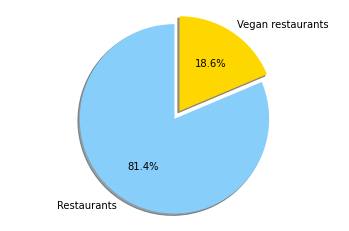

In [21]:
total = df['All restaurants'].sum()
vegan = df['Vegan restaurants'].sum()

labels = 'Restaurants', 'Vegan restaurants'
sizes = total, vegan
colors = ['lightskyblue', 'gold']
explode = (0, 0.1)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

### Not too bad

This suggests that almost one quarter of restaurants offer vegan options, which would let you believe that you are never really that far from such an eatery in these cities.

Unfortunately, it is not that simple.

----
## Where you are matters

Let's investigate how cities rank in terms of the number of vegan restaurants out of all the restaurants. In other words, where are you most likely to stumble upon a restaurant that caters for vegans?

In [10]:
# Create new column with vegan restaurant percentage and sort them in descending order

df['Vegan rest. ratio'] = (df['Vegan restaurants'] / df['All restaurants']) * 100
df.sort_values(by=['Vegan rest. ratio'], ascending=False)

,City,All restaurants,Vegan restaurants,Vegan rest. ratio
Rank,,,,
14,Brighton,1150,383,33.304348
4,Edinburgh,1927,635,32.952776
16,York,692,215,31.069364
19,Norwich,599,175,29.215359
8,Bristol,1302,369,28.341014
20,Bournemouth,620,173,27.903226
12,Cardiff,918,249,27.124183
5,Glasgow,1875,500,26.666667
13,Newcastle upon Tyne,960,256,26.666667


<AxesSubplot:ylabel='City'>

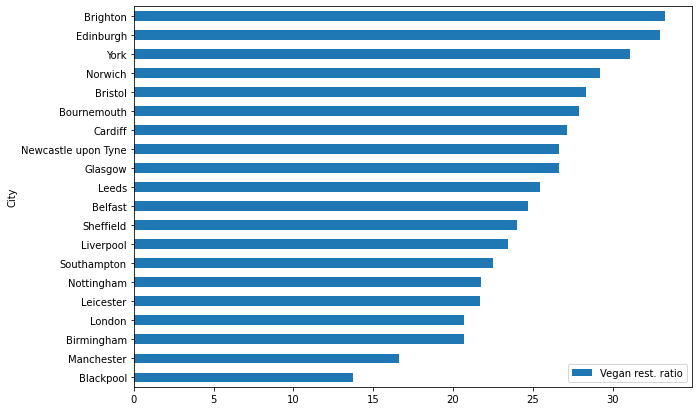

In [19]:
df.sort_values(by=['Vegan rest. ratio'], ascending=True).plot.barh(x='City', y='Vegan rest. ratio', figsize=(10,7))

## Context

The question I try to find the answer to is **which UK cities are the best for vegans to eat out in**, that is, which cities have the most restaurants offering vegan option. 

In order to put the number of restaurants, vegan or not, into context, let's take a look at the population data.

*(data from: https://worldpopulationreview.com/countries/cities/united-kingdom)*

In [22]:
popdf = pd.read_csv('populationdata.csv')
popdf

,2021,City
0,7556900,London
1,984333,Birmingham
2,864122,Liverpool
3,729977,Nottingham
4,685368,Sheffield
...,...,...
395,30587,Beverley
396,30555,Deal
397,30510,Wishaw
398,30420,Pontypridd


In [23]:
# Merge the two dataframes
newdf = pd.merge(df, popdf, how='left', on='City')
newdf.rename(columns = {'2021':'Population'}, inplace=True)
newdf.sort_values(by=['Population'], ascending=False)

,City,All restaurants,Vegan restaurants,Vegan rest. ratio,Population
0,London,20237,4192,20.714533,7556900
2,Birmingham,2028,420,20.710059,984333
6,Liverpool,1602,376,23.470662,864122
9,Nottingham,1047,228,21.776504,729977
8,Sheffield,1279,307,24.003127,685368
7,Bristol,1302,369,28.341014,617280
4,Glasgow,1875,500,26.666667,591620
10,Leicester,1061,230,21.677663,508916
3,Edinburgh,1927,635,32.952776,464990
5,Leeds,1707,435,25.483304,455123


---
So how do these cities fare when we consider not the vegan to non-vegan restaurant ratio, but rather the distribution of vegan restaurants per capita?

In [26]:
newdf['true_vegan_ratio'] = newdf['Vegan restaurants'] / newdf['Population'] *100
newdf.sort_values(by=['true_vegan_ratio'], ascending=False)

,City,All restaurants,Vegan restaurants,Vegan rest. ratio,Population,true_vegan_ratio
13,Brighton,1150,383,33.304348,139001,0.275538
15,York,692,215,31.069364,153717,0.139867
3,Edinburgh,1927,635,32.952776,464990,0.136562
12,Newcastle upon Tyne,960,256,26.666667,192382,0.133069
1,Manchester,2584,429,16.602167,395515,0.108466
19,Bournemouth,620,173,27.903226,163600,0.105746
5,Leeds,1707,435,25.483304,455123,0.095579
4,Glasgow,1875,500,26.666667,591620,0.084514
18,Norwich,599,175,29.215359,213166,0.082096
14,Belfast,863,213,24.681344,274770,0.077519


In [29]:
# newdf.sort_values(by=['true_vegan_ratio'], ascending=True).plot.barh(x='City', y=['Population','Vegan rest. ratio'], figsize=(10,7))

<AxesSubplot:>

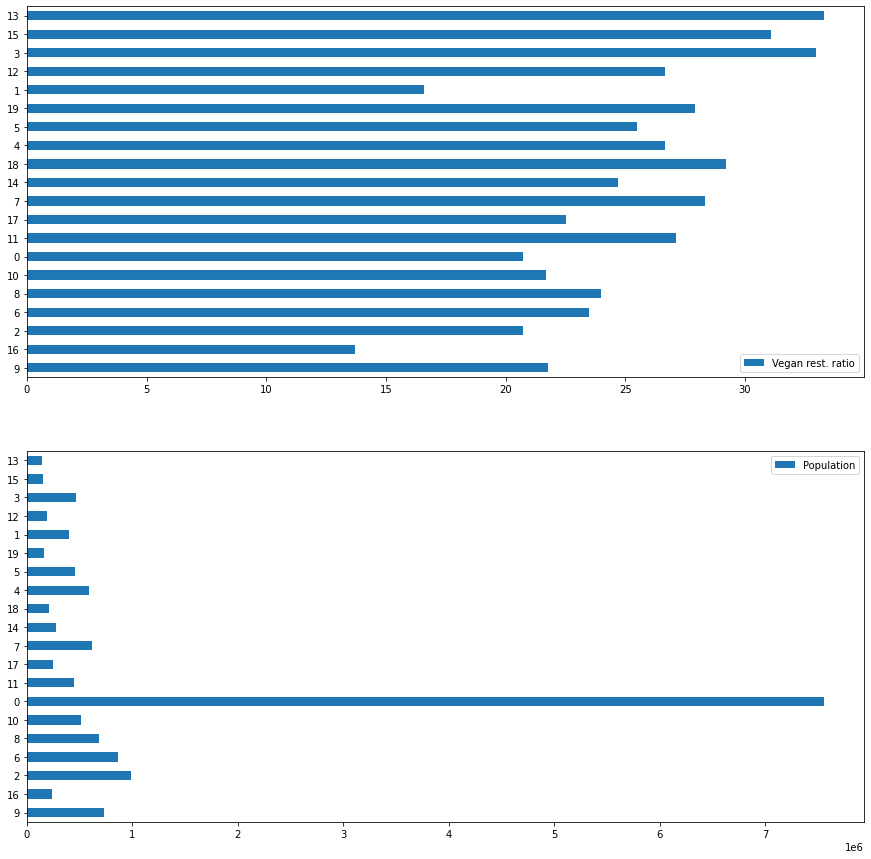

In [59]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,15))

newdf.sort_values(by=['true_vegan_ratio'], ascending=True)[['City', 'Vegan rest. ratio']].plot(ax=axes[0], kind='barh')


newdf.sort_values(by=['true_vegan_ratio'], ascending=True)[['City', 'Population']].plot(ax=axes[1], kind='barh')
# df[["a","b"]].plot(ax=axes[0], kind='bar')
# df[["c", "d"]].plot(ax=axes[1], kind='bar');